<a href="https://colab.research.google.com/github/wogyfikacja/MachineLearning/blob/master/Projekt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as num
import pandas as pan
import matplotlib as mat
import seaborn as sns


from operator import itemgetter
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading datasets

In [ ]:
data = pan.read_csv('/content/drive/MyDrive/NAI/iris.csv')
data.head()

,nr,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data.describe()

,nr,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#@title normalization seems to make the algo worse, so I wont do it
dataNum = data.loc[:,data.columns != 'nr'].select_dtypes(include='number') 
dataNumNorm = (dataNum - dataNum.mean())/dataNum.std()
data[dataNumNorm.columns] = dataNumNorm

In [ ]:
data.describe()

,nr,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,75.500000,-1.457168e-15,-1.638319e-15,-1.292300e-15,-5.543714e-16
std,43.445368,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,38.250000,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,75.500000,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,112.750000,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,150.000000,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


In [ ]:
train = pan.read_csv('/content/drive/MyDrive/NAI/train.csv')
train.head()

,nr,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.7,2.5,5.0,2.0,Iris-virginica
1,2,5.6,3.0,4.1,1.3,Iris-versicolor
2,3,5.5,3.5,1.3,0.2,Iris-setosa
3,4,5.0,3.6,1.4,0.2,Iris-setosa
4,5,5.8,2.6,4.0,1.2,Iris-versicolor


In [ ]:
test = pan.read_csv('/content/drive/MyDrive/NAI/test.csv')
test.head()

,nr,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,4.7,3.2,1.6,0.2,Iris-setosa
1,2,6.9,3.1,4.9,1.5,Iris-versicolor
2,3,5.6,3.0,4.5,1.5,Iris-versicolor
3,4,6.3,2.8,5.1,1.5,Iris-virginica
4,5,5.5,2.3,4.0,1.3,Iris-versicolor


# Training dataset plot

Text(0.5, 1.05, 'Training Dataset')

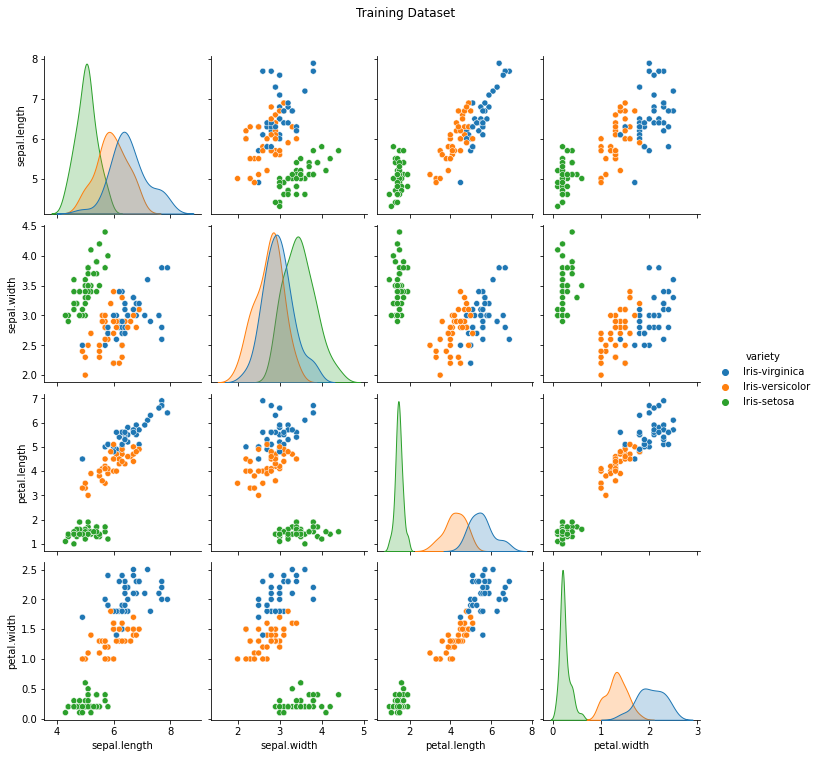

In [ ]:
trainPlots = sns.pairplot(data = train.drop('nr', axis=1),hue='variety')
trainPlots.fig.suptitle('Training Dataset', y = 1.05)

# Distances

In [ ]:
#@title <- this is a bottleneck, if i have some time will change to be faster
distances = pan.DataFrame({'nrTest' : [], 'nrTrain' : [], 'distance' : [], 'val': []})

for testIndex, testRow in test.iterrows():
  for trainIndex, trainRow in train.iterrows():
    sum = 0
    for i in range(1, len(train.columns) - 1):
      sum = sum + (trainRow[i] - testRow[i])**2

    distances = distances.append({
                        'nrTest' : testRow['nr'],
                        'nrTrain' : trainRow['nr'],
                        'distance' : num.sqrt(sum),
                        'val' : trainRow['variety']
                        },ignore_index = True)
    
  distances.sort_values(['nrTest','distance'],inplace=True)

In [ ]:
distances.head()

,nrTest,nrTrain,distance,val
0,1.0,82.0,0.000000,Iris-setosa
1,1.0,94.0,0.173205,Iris-setosa
2,1.0,74.0,0.223607,Iris-setosa
3,1.0,106.0,0.223607,Iris-setosa
4,1.0,63.0,0.264575,Iris-setosa


In [ ]:
#@title Decide on k value
k =  4#@param {type:"number"}

In [ ]:
chosenSmallest = pan.DataFrame()

for row in test.itertuples():
  chosenSmallest = chosenSmallest.append(distances.loc[distances['nrTest'] == getattr(row,'nr')].nsmallest(k,'distance'))

In [ ]:
chosenSmallest.head(k*10)

,nrTest,nrTrain,distance,val
0,1.0,82.0,0.000000,Iris-setosa
120,2.0,69.0,0.000000,Iris-versicolor
240,3.0,93.0,0.300000,Iris-versicolor
360,4.0,88.0,0.000000,Iris-virginica
480,5.0,55.0,0.000000,Iris-versicolor
600,6.0,43.0,0.000000,Iris-versicolor
720,7.0,68.0,0.000000,Iris-versicolor
840,8.0,27.0,0.000000,Iris-setosa
960,9.0,12.0,0.000000,Iris-versicolor
1080,10.0,64.0,0.141421,Iris-versicolor


In [ ]:
answers = chosenSmallest.groupby(['nrTest','val']).size().reset_index(name = 'Count').sort_values(['nrTest','Count'],ascending = False).groupby('nrTest').first().reset_index()
answers.head(50)

,nrTest,val,Count
0,1.0,Iris-setosa,1
1,2.0,Iris-versicolor,1
2,3.0,Iris-versicolor,1
3,4.0,Iris-virginica,1
4,5.0,Iris-versicolor,1
5,6.0,Iris-versicolor,1
6,7.0,Iris-versicolor,1
7,8.0,Iris-setosa,1
8,9.0,Iris-versicolor,1
9,10.0,Iris-versicolor,1


In [ ]:
finalGuess = test.reset_index()
finalGuess['guess'] = answers['val']
finalGuess.head(60) 

,index,nr,sepal.length,sepal.width,petal.length,petal.width,variety,guess
0,0,1,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
1,1,2,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor
2,2,3,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor
3,3,4,6.3,2.8,5.1,1.5,Iris-virginica,Iris-virginica
4,4,5,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor
5,5,6,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
6,6,7,5.5,2.5,4.0,1.3,Iris-versicolor,Iris-versicolor
7,7,8,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
8,8,9,6.6,2.9,4.6,1.3,Iris-versicolor,Iris-versicolor
9,9,10,6.1,3.0,4.6,1.4,Iris-versicolor,Iris-versicolor


Text(0.5, 1.05, 'Guesses')

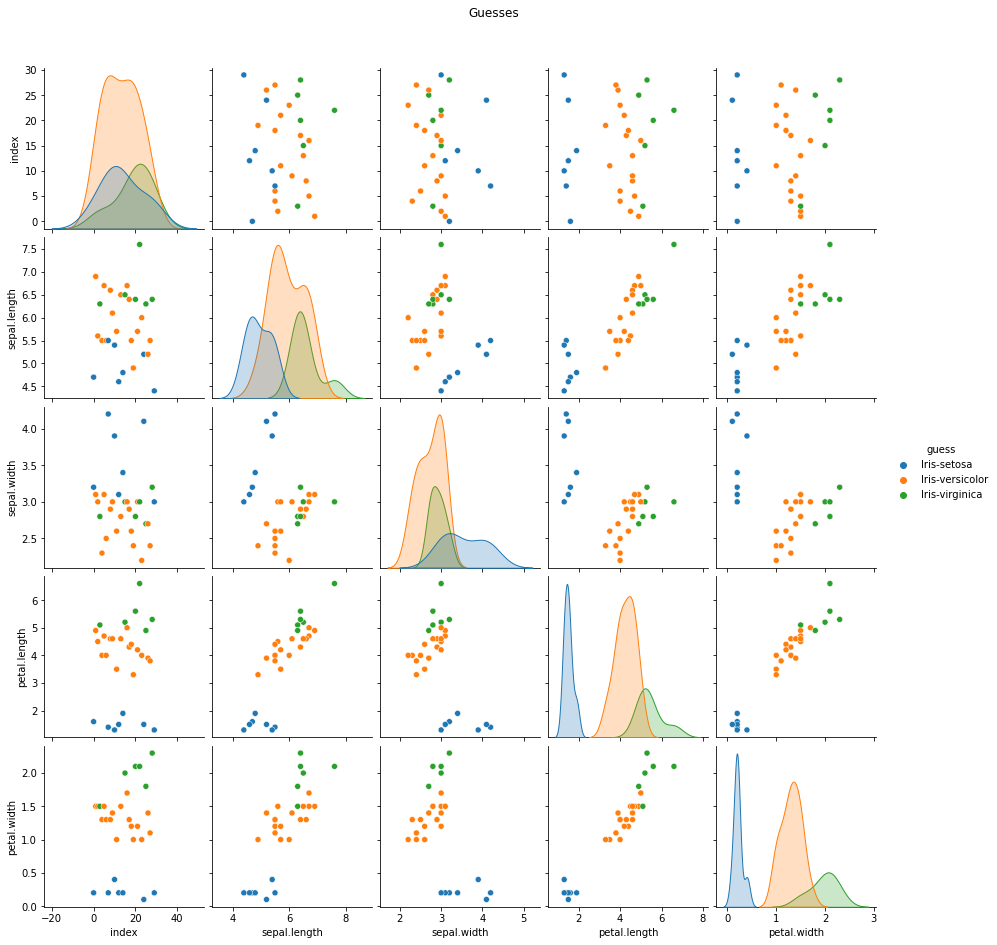

In [ ]:
finalPlot = sns.pairplot(data=finalGuess.drop('nr',axis=1).drop('variety',axis=1),hue='guess')
finalPlot.fig.suptitle('Guesses',y=1.05)

# Mistakes

In [ ]:
finalGuess['gotOrNot'] = num.where((finalGuess['guess'] == finalGuess['variety']),1,0)
finalGuess.head()

,index,nr,sepal.length,sepal.width,petal.length,petal.width,variety,guess,gotOrNot
0,0,1,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa,1
1,1,2,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,1
2,2,3,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor,1
3,3,4,6.3,2.8,5.1,1.5,Iris-virginica,Iris-virginica,1
4,4,5,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,1


In [ ]:
numOfThings = finalGuess.count()
numOfGot = finalGuess['gotOrNot'].sum()

print('Dokladnosc to: ' , num.divide(numOfGot,numOfThings)['index'])

Dokladnosc to:  1.0


# Adding a new record

In [ ]:
#@title New object to classify
newObj = "4.6,3.2,1.6,0.2" #@param {type: "string"}

arr = num.fromstring(newObj,dtype=num.float16,sep=',')
arr

array([4.6, 3.2, 1.6, 0.2], dtype=float16)

In [ ]:

temp1 = train
temp = data.loc[:,data.columns != 'nr'].select_dtypes(include='number')
temp = (temp - arr)**2
temp = temp.sum(axis=1)
temp1['suma'] = temp
final = temp1.nsmallest(k,'suma').value_counts('variety').idxmax()


final

'Iris-setosa'